In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import erf
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1. Write a python code that finds a and b for a given data set.

In [2]:
#Leemos los datos
x, y=np.loadtxt('datos.txt', unpack=True).T

In [3]:
#encontramos la media
ybar=np.mean(y)
xbar=np.mean(x)
n=len(x)

In [4]:
#encontramos los valores de a y b
a=(np.sum(x*y)-n*xbar*ybar)/(np.sum(x**2)-n*xbar**2)
b=(ybar*np.sum(x**2)-xbar*np.sum(x*y))/(np.sum(x**2)-n*xbar**2)
a,b

(10.000000000000025, 4.999999999999982)

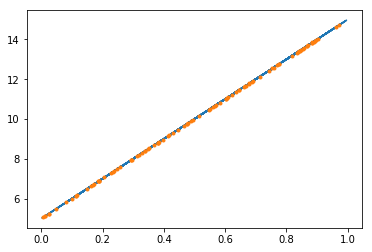

In [5]:
#Graficamos los datos y la función con los valores que encontramos de a y b

m=np.random.random(len(x))
plt.plot(m,a*m+b,'-')
plt.plot(x,y,'.')

# 2. Show explicitly that the linear least square method is derived from the mininimization of the chisquare when the model is a straigh

 Tenemos que 
  
$$ \chi^{2}=\sum(y_{i}-y(x_{i},\theta))^{2}/\sigma_{y_{i}}^{2} $$

donde $\sigma_{y_{i}}^{2}= \sum(y_{i}-\bar{y})^{2}$. Así que, si tenemos una recta, entonces $y(x_{i},\theta)=a*x_{i}+b$, de esta manera, si hacemos la minimización de $\chi^{2}$, obtenemos el método de mínimos cuadrados, enseguida lo muestro. 

Hagamos primero la derivada parcial de $\chi^{2}$ con respeto a $a$, así

$$ \frac{\partial \chi^{2}}{\partial a}=\frac{\sum(y_{i}-ax_{i}-b)(-x_{i})}{\sigma_{y_{i}}^{2}}=0 $$

de aquí, despejando $b$ tenemos que 

$$b= \frac{\sum x_{i}y_{i}-a\sum x_{i}^{2}}{\sum x_{i}} $$

Ahora hacemos la derivada con respecto a $b$

$$ \frac{\partial \chi^{2}}{\partial a}=\frac{\sum(y_{i}-ax_{i}-b)(-1)}{\sigma_{y_{i}}^{2}}=0 $$

de donde tenemos que $\sum y_{i}-a\sum x_{i} -nb=0$, al sustituir el valor que anteriormente ya teníamos de b, nos queda que

$$ \sum y_{i}-a\sum x_{i}-n\frac{\sum x_{i}y_{i}-a\sum x_{i}^{2}}{\sum x_{i}}=0$$

Ya que $\bar{y}=\sum y_{i}/n$ y $\bar{x}=\sum x_{i}/n$, tenemos que

$$\frac{a}{\bar{x}}(\sum x_{i}^{2}-\bar{x}\sum x_{i})=\frac{\sum x_{i}y_{i}}{\bar{x}}-\sum y_{i}$$

lo que al final nos deja con 

$$a=\frac{\sum x_{i}y_{i}-n\bar{x}\bar{y}}{\sum x_{i}^{2}-n\bar{x}^{2}}$$

Ahora sustituimos el valor de $a$ en la ecuación que teníamos para $b$, esto es:

$$b=\frac{\sum x_{i}y_{i}}{\sum x_{i}}-\frac{\sum x_{i}y_{i}-n\bar{x}\bar{y}}{\sum x_{i}^{2}-n\bar{x}^{2}}\frac{\sum x_{i}^{2}}{\sum x_{i}}$$

lo que podemos escribir como

$$b=\frac{1}{n\bar{x}(\sum x_{i}^{2}-n\bar{x}^{2})}[\sum x_{i}y_{i}(\sum x_{i}^{2}-n\bar{x}^{2})-(\sum x_{i}y_{i}-n\bar{x}\bar{y})\sum x_{i}^{2}]$$

lo que al simplicar nos lleva a que

$$b=\frac{\bar{y}\sum x_{i}^{2}-\bar{x}\sum x_{i}y_{i}}{\sum x_{i}^{2}-n\bar{x}^{2}}$$

Así hemos llegado al resultado que esperábamos.

#  3. Find the cumulative distribution function for the Gaussian Distribution, and reproduce the plots. Choose a random number between 0 and 1, and use the CDF to assign the corresponding value of H0. Generate as many as you want, and make the histogram of H0 to verify you did it right. Use a mean of 70 and a sigma=2.

In [6]:
x1= np.zeros(1000)
cdf= np.zeros(1000)

In [7]:
prom=70.0
sigma=2.0

x1 = np.random.normal(prom, sigma, 1000)

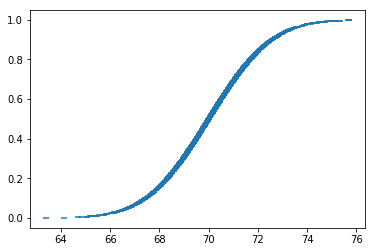

In [8]:
#Funcion acumluativa

cdf = 0.5*(1.0 + erf((x1-prom) / (sigma*sqrt(2.0))))


plt.scatter(x1,cdf,marker='_')

/home/ale/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.00405175, 0.        , 0.        , 0.00405175, 0.        ,
        0.0081035 , 0.0081035 , 0.01215525, 0.02431051, 0.01215525,
        0.02025876, 0.06077627, 0.04862101, 0.04456926, 0.05267276,
        0.09724203, 0.08103502, 0.10534553, 0.12560428, 0.12560428,
        0.12965604, 0.11750078, 0.19448405, 0.23905332, 0.1823288 ,
        0.1742253 , 0.21069106, 0.18638055, 0.19448405, 0.1904323 ,
        0.21474281, 0.15801829, 0.1823288 , 0.14991479, 0.08913852,
        0.08913852, 0.10534553, 0.08103502, 0.07293152, 0.07293152,
        0.03646576, 0.02431051, 0.016207  , 0.02431051, 0.02431051,
        0.01215525, 0.01215525, 0.01215525, 0.0081035 , 0.01215525]),
 array([63.3730502 , 63.61985707, 63.86666393, 64.1134708 , 64.36027767,
        64.60708454, 64.8538914 , 65.10069827, 65.34750514, 65.59431201,
        65.84111887, 66.08792574, 66.33473261, 66.58153948, 66.82834634,
        67.07515321, 67.32196008, 67.56876695, 67.81557382, 68.06238068,
        68.30918755, 68.55

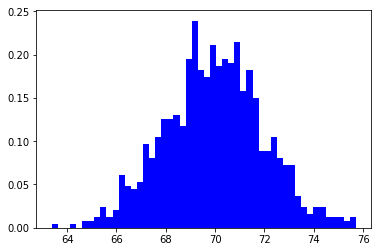

In [9]:
#histograma
plt.hist(x1, bins=50, normed=True, color='b')


# 4. If $y=\Phi(x)=exp(x)$ and $p(x)=1$ for $0\leq x \leq 1$ (an uniform distribution). What is the resultant distribution for $y$  

De manera general tenemos que 

$$p(y)=p[\Phi^{-1}(y)]\left|\frac{d\Phi^{-1}(y)}{dy}\right|$$

para este caso, 

$$y=\Phi(x)=\exp(x)$$

así que $\Phi^{-1}(y)=\ln(y)=x$, por tanto 

$$\frac{d\Phi^{-1}(y)}{dy}=\frac{\ln(y)}{dy}=\frac{1}{y}$$

y $p(x)=p[\Phi^{-1}(y)]=1$, cuando $1\leq y \leq e$, así que

$$p(y)=\frac{1}{y}$$

cuando $1\leq y \leq e$.

# 5. Reproduce the plots of the Uniform distribution of points inside a circle, and a sphere. 

In [10]:
#Generamos ángulos random uniformes entre 0 y 2pi, y r² random uniformes entre 0 y 1

theta=np.random.random(10000)*2*pi
r2=np.random.random(10000)
r=r2**(1/2)


x=r*cos(theta)
y=r*sin(theta)

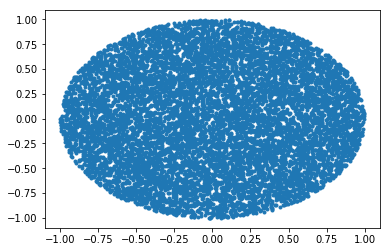

In [11]:
plt.plot(x,y,'.')


In [12]:
#Generamos ángulos random uniformes entre 0 y 2pi, r² random uniformes entre 0 y 1 y z=cos(phi)

theta_1=np.random.random(1000)*2*pi
r2_1=np.random.random(1000)
r_1=r2_1**(1/2)
cosphi=np.random.uniform(-1,1,1000)
phi=np.arccos(cosphi)

x=r_1*cos(theta_1)*sin(phi)
y=r_1*sin(theta_1)*sin(phi)
z=r_1*cosphi

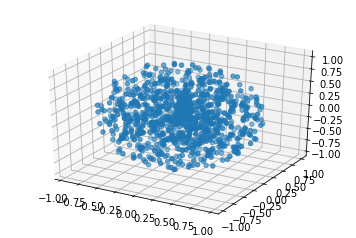

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z)